# "One-way ANOVA"
> Comparaison d’une variable indépendante dans plusieurs groupe par l’analyse de leur variance.

- hide: true
- categories: [statistiques, ANOVA]
- image: images/one-way_ANOVA/boxplot.png
- comments : true

### Où s’utilise cette méthode
Nous trouvons cette méthode d’analyse de la variance dans les sciences comme la psychologie, les sciences sociales,  les sciences naturelles. Elle permet l’analyse d’une variable indépendante dans plusieurs groupes : un sociologue pourra mesurer le niveau de salaire d’une personne en fonction de son niveau d’étude, un consommateur pourra comparer la consommation moyenne de véhicules suivant le modèle…
Pour mesurer plusieurs groupes, les statisticiens ont développé la méthode d’analyse de la variance ou ANOVA. 
La plus simple, qui analyse une seule variable indépendante est la one-way ANOVA.

### Principe
Le but de la méthode one-way ANOVA est de trouver s’il existe une différence statistiquement significative dans les moyennes de plusieurs groupes. La méthode utilise la variance pour vérifier que les moyennes sont semblables.

### Hypothèses de travail

1. Chaque échantillon est pris d’une population dont la distribution est considérée comme suivant une loi Normale.
2. L’échantillonnage est aléatoire, et le tirage de chaque groupe est indépendent.
3. Les populations des groupes ont un écart type équivalent ou égal.
4. Le facteur est une variable de catégorie
5. La réponse est une variable numérique

### Test d’hypothèse

L’hypothèse nulle est le cas dans lequel toutes les moyennes sont égales. L’hypothèse alternative est qu’au moins un couple de moyennes n’est pas équivalent. 

### Calcul du test d’hypothèse

Pour réaliser le calcul, nous utilisons la *distribution F*. Cette statistique est un ratio (un rapport, une fraction) comprenant deux degrés de liberté, un pour le numérateur, l’autre pour le dénominateur.

> Note : La distribution F dérive du t-test et de la distribution Student, qui est simplement l’élévation au carré de celle-là. Il est préférable d’utiliser la méthode one-way ANOVA quand on veut étudier plusieurs groupes au-lieu que de réaliser de multiple t-test à cause du risque $\alpha$ qui est le rejet de l’hypothèse nulle alors qu’elle est vraie.


### Le calcul de Ratio-F

$F = \frac{MS_{between}}{MS_{within}}$
La valeur de F est le rapport entre la moyenne de la variance au carré entre les groupes, et la moyenne de la variance au carré dans les groupes (dû à l’échantillonage).

$MS_{between} = \frac{SS_{between}}{df_{between}} = \frac{SS_{between}}{k - 1}$ avec $k$ comme nombre de groupe

$MS_{within} = \frac{SS_{within}}{df_{within}} = \frac{SS_{within}}{n-k}$ avec $n$ comme somme de la quantité d’observations pour tous les groupes.

Quand les groupes ont la même taille, la valeur de F revient à :

$F=\frac{n \cdot {s_{\bar{x}}}^{2}}{s^{2}}$

Nous détaillerons plus le calcul dans l’exemple suivant.

## Importation des modules scientifiques
Pour réaliser nos calculs nous aurons besoin de la bibliothèque scientifique de python [scipy](https://docs.scipy.org/doc/) et également de numpy pour construire nos tableaux de valeurs. Pour l’installation dans Jupyter-notebook, nous pouvons utiliser la commande suivante :

In [1]:
!pip install scipy numpy

Nous importons la méthode pour la méthode one-way ANOVA, la fonction de densité de F et le module numpy

In [2]:
from scipy.stats import f_oneway
from scipy.special import fdtrc
import numpy as np

## Exemple
Nous collectons des données du supermarché du coin afin de réaliser une analyse de la variance sur trois produits : des fruits, des légumes et des pains.
Nous collectons nos données de manière aléatoire à partir des rayons de notre supermarché en prenant le prix au kilos de huit produits non contigus dans chacun des rayons. Nous retrouvons nos 3 catégories et les valeurs numériques (prix par kilogramme) comme suivant :

In [3]:
fruits  = np.array([1.99, 3.05, 2.60, 1.45, 2.99, 2.91, 2.72, 3.15])
legumes = np.array([1.25, 1.75, 1.40, 1.66, 2.20, 2.70, 3.00, 1.99])
pains   = np.array([0.90, 1.25, 1.10, 1.55, 2.20, 3.00, 3.05, 1.05])

L’hypothèse nulle $H_{0}$ est que les moyennes des prix de ces trois catégories de produit ne sont pas statistiquement différentes de manière significative au vue de notre jeu de données. Nous pourrons prendre une pvalue de 5%, ce qui représente une certitude de 95% quant à notre résultat, en statistique.

Pour les fruits, les légumes, et les pains, nous avons les valeurs statistiques suivantes :

In [4]:
fruits_mean = fruits.mean()
fruits_var = fruits.var()
fruits_cnt = len(fruits)
fruits_stat = 'La moyenne des fruits est ' + f'{fruits_mean:0.3}' + ', La variance est ' \
                + f'{fruits_var:0.2}' + ', Le nombre d’observations est ' + f'{fruits_cnt}'
fruits_stat

'La moyenne des fruits est 2.61, La variance est 0.31, Le nombre d’observations est 8'

In [5]:
legumes_mean = legumes.mean()
legumes_var = legumes.var()
legumes_cnt = len(legumes)
legumes_stat = 'La moyenne des légumes est ' + f'{legumes_mean:0.3}' + ', La variance est ' \
                + f'{legumes_var:0.2}' + ', Le nombre d’observations est ' + str(legumes_cnt)
legumes_stat

'La moyenne des légumes est 1.99, La variance est 0.33, Le nombre d’observations est 8'

In [6]:
pains_mean = pains.mean()
pains_var = pains.var()
pains_cnt = len(pains)
pains_stat = 'La moyenne des pains est ' + f'{pains_mean:0.3}' + ', La variance est ' \
                + f'{pains_var:0.2}' + ', Le nombre d’observations est ' + str(pains_cnt)
pains_stat

'La moyenne des pains est 1.76, La variance est 0.67, Le nombre d’observations est 8'

### Estimation du ratio-F, par la distribution Fischer
Pour parvenir à notre résultat, nous ferons plusieurs calculs.

Les degrés de libertés sont (pour n = 24 , k = 3) :

$df_{num} = 3 - 1$ soit 2

et 

$df_{denom} = 24 - 3$ soit 21

La valeur de F que nous cherchons est $F_{2,21}$ soit dans la table des valeurs de la distribution F : 3.46

In [7]:
alldata = np.concatenate([[fruits,legumes,pains]])
k = len(alldata) # Nombre de catégories ...2
N = alldata.shape[0] * alldata.shape[1] # Nombre d’observations ...24
n = alldata.shape[1] # Nombre d’observations dans chaque catégorie ...8

In [8]:
df_num = k - 1
df_denom = N - k

$SS_{between} = \frac{\sum{x^2}}{n} - \frac{(\sum{x})^2}{N}$

In [9]:
SS_between = (np.array([fruits.sum()**2, legumes.sum()**2, pains.sum()**2]).sum()/n ) \
               - (np.array([fruits.sum(), legumes.sum(), pains.sum()]).sum()**2 /N)

$SS_{tot} = \sum{x^2} - \frac{(\sum{x})^2}{N}$

In [10]:
SS_tot = (np.array([fruits**2, legumes**2, pains**2]).sum())- \
(np.array([fruits, legumes, pains]).sum()**2 /24)

$SS_{within} = SS_{tot}- SS_{between}$

In [11]:
SS_within = SS_tot - SS_between

In [12]:
MS_between = SS_between / df_num

In [13]:
MS_within = (SS_within) / df_denom

In [14]:
F = MS_between / MS_within
F

3.0596582667896874

$pvalue = P(F> 3.46) = 0.0682$

In [15]:
pvalue = fdtrc(df_num, df_denom, F)
pvalue

0.06821436223117332

En conclusion, d’après nos données, nous sommes sûr à 95% que l’hypothèse nulle $H_{0}$ doit-être rejetée.

La même conclusion peut être calculée, plus rapidement, avec la méthode f_oneway() du module scipy.

In [16]:
f_oneway(fruits, legumes, pains)

F_onewayResult(statistic=3.059658266789707, pvalue=0.06821436223117218)

### Restituer graphiquement le résultat

Pour observer nos résultats et comprendre visuellement le résultat statistique qui indique que les moyennes sont différentes, nous allons importer deux autres modules en Python pour dessiner nos données.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

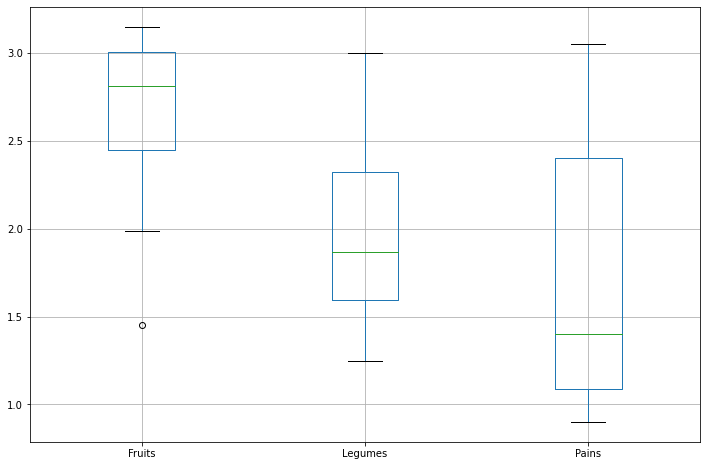

In [18]:
# Transformer en cadre de données
df = pd.DataFrame(alldata.T, columns=['Fruits','Legumes','Pains'])
# Dessiner un graphique de boîte à moustache
boxplot = df.boxplot( figsize=(12, 8))
# Sauvegarder vos boîtes à moustaches
plt.savefig('image.png')

Grâce à ce graphique qui représente en plus, très bien les quartiles, nous pouvons voir que les fruits contiennent une valeur aberrante, un outsider, très loin du reste du paquet de l’échantillon.